In [1]:
import time
import os
import pandas as pd
import numpy as np
import re
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path=r"/content/drive/MyDrive/saved model/CAIRSENSE_DataFiles.xlsx"

xls = pd.ExcelFile(path)
xls_list=xls.sheet_names

df_list=[]

for i in range(len(xls_list)):
  df_list.append(pd.read_excel(path, sheet_name=xls_list[i]))

In [4]:
sensor=xls_list
sensor

['Metadata',
 'Aeroqual',
 'AirAssure',
 'Airbeam',
 'Cairclip',
 'DylosPMC',
 'DylosPMF',
 'OPCPMF',
 'OPCPMT',
 'Shinyei',
 'Speck',
 'TZOA',
 'Wind']

In [5]:
for i in range(len(df_list)):
  display(df_list[i].head(5))

,Column Heading,Contents,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Sheet Name,Sensor Units,Reference Units
0,timestamp,Measurement timestamp in CST,NaN,NaN,NaN,NaN,Aeroqual,"O3, ppm","O3, ppm"
1,TEMP,Temperature in degrees Celsiu,NaN,NaN,NaN,NaN,AirAssure,"PM2.5, µg/m³","PM2.5, µg/m³"
2,RHAMB,Relative Humidity in %,NaN,NaN,NaN,NaN,Airbeam,"Particle Count, hppcf","PM2.5, µg/m³"
3,WD,"Wind Direction, degrees",NaN,NaN,NaN,NaN,Cairclip,"O3 + NO2, ppb","O3, NO2, O3+NO2, ppb"
4,WS,Wind Speed in m/s,NaN,NaN,NaN,NaN,DylosPMC,"""Large"" Particle Count, hppcf","PM10 - PM2.5, µg/m³"


,timestamp,Aeroqual1,Aeroqual2,Aeroqual3,SoC,TEMP,RHAMB
0,2015-09-08 23:00:00,0.001,NaN,0.006,0.016,67.5,36.8
1,2015-09-08 23:01:00,0.006,NaN,0.006,0.022,67.6,36.3
2,2015-09-08 23:02:00,0.010,NaN,0.012,0.026,67.7,35.8
3,2015-09-08 23:03:00,0.010,NaN,0.015,0.026,67.8,35.8
4,2015-09-08 23:04:00,0.012,NaN,0.011,0.024,67.9,35.8


,timestamp,AirAssure1,AirAssure2,AirAssure3,TEMP,SoC,RHAMB
0,2015-09-08 23:00:00,9.162,8.546,6.777,67.5,6.8,36.8
1,2015-09-08 23:01:00,9.097,8.061,6.777,67.6,6.6,36.3
2,2015-09-08 23:02:00,9.188,8.048,6.829,67.7,6.9,35.8
3,2015-09-08 23:03:00,9.165,7.648,6.733,67.8,6.1,35.8
4,2015-09-08 23:04:00,9.110,7.262,6.593,67.9,5.8,35.8


,timestamp,Airbeam1,Airbeam2,Airbeam3,TEMP,SoC,RHAMB
0,2015-09-08 23:00:00,1855.94,NaN,NaN,67.5,6.8,36.8
1,2015-09-08 23:01:00,1835.57,NaN,NaN,67.6,6.6,36.3
2,2015-09-08 23:02:00,1996.74,NaN,NaN,67.7,6.9,35.8
3,2015-09-08 23:03:00,1711.92,NaN,NaN,67.8,6.1,35.8
4,2015-09-08 23:04:00,2075.87,NaN,NaN,67.9,5.8,35.8


,timestamp,Cairclip1,Cairclip2,Cairclip3,TEMP,RHAMB,SOCP,SoCO3,SoCNO2
0,2015-09-08 23:00:00,NaN,NaN,10.0,67.5,36.8,42.3,16.0,26.3
1,2015-09-08 23:01:00,NaN,NaN,10.0,67.6,36.3,42.9,22.0,20.9
2,2015-09-08 23:02:00,NaN,NaN,14.0,67.7,35.8,45.6,26.0,19.6
3,2015-09-08 23:03:00,NaN,NaN,13.0,67.8,35.8,45.6,26.0,19.6
4,2015-09-08 23:04:00,NaN,NaN,15.0,67.9,35.8,43.7,24.0,19.7


,timestamp,Dylos1,Dylos2,Dylos3,TEMP,RHAMB,SoC
0,2015-09-08 23:00:00,21.0,110.0,NaN,67.5,36.8,9.3
1,2015-09-08 23:01:00,19.0,92.0,NaN,67.6,36.3,6.6
2,2015-09-08 23:02:00,15.0,72.0,NaN,67.7,35.8,6.4
3,2015-09-08 23:03:00,11.0,78.0,NaN,67.8,35.8,6.4
4,2015-09-08 23:04:00,12.0,83.0,NaN,67.9,35.8,6.4


,timestamp,Dylos1,Dylos2,Dylos3,TEMP,SoC,RHAMB
0,2015-09-08 23:00:00,213.0,1298.0,NaN,67.5,6.8,36.8
1,2015-09-08 23:01:00,219.0,1320.0,NaN,67.6,6.6,36.3
2,2015-09-08 23:02:00,191.0,1276.0,NaN,67.7,6.9,35.8
3,2015-09-08 23:03:00,189.0,1206.0,NaN,67.8,6.1,35.8
4,2015-09-08 23:04:00,185.0,1215.0,NaN,67.9,5.8,35.8


,timestamp,OPC1,OPC2,OPC3,TEMP,SoC,RHAMB
0,2015-09-09 11:00:00,1.578333,2.048333,0.0,85.3,3.9,8.7
1,2015-09-09 11:01:00,1.585000,1.975000,0.0,85.5,4.1,8.5
2,2015-09-09 11:02:00,2.203333,2.316667,0.0,85.2,4.0,8.2
3,2015-09-09 11:03:00,1.736667,2.536667,0.0,85.2,4.9,8.2
4,2015-09-09 11:04:00,1.651667,2.070000,0.0,84.8,4.0,8.0


,timestamp,OPC1,OPC2,OPC3,TEMP,SoC,RHAMB
0,2015-09-09 11:00:00,8.996667,6.451667,0.0,85.3,12.0,8.7
1,2015-09-09 11:01:00,8.743333,9.783333,0.0,85.5,14.3,8.5
2,2015-09-09 11:02:00,8.693333,4.301667,0.0,85.2,9.0,8.2
3,2015-09-09 11:03:00,8.326667,6.790000,0.0,85.2,10.7,8.2
4,2015-09-09 11:04:00,7.120000,5.870000,0.0,84.8,6.9,8.0


,timestamp,Shinyei1,Shinyei2,Shinyei3,TEMP,SoC,RHAMB
0,2015-09-08 23:00:00,5.256,NaN,6.426,67.5,6.8,36.8
1,2015-09-08 23:01:00,7.056,NaN,5.544,67.6,6.6,36.3
2,2015-09-08 23:02:00,5.958,NaN,5.508,67.7,6.9,35.8
3,2015-09-08 23:03:00,5.238,NaN,4.284,67.8,6.1,35.8
4,2015-09-08 23:04:00,5.310,NaN,4.896,67.9,5.8,35.8


,timestamp,Speck1,Speck2,Speck3,TEMP,SoC,RHAMB
0,2015-08-31 11:00:00,20.9,NaN,NaN,NaN,NaN,NaN
1,2015-08-31 11:01:00,20.5,NaN,NaN,NaN,NaN,NaN
2,2015-08-31 11:02:00,19.0,NaN,NaN,NaN,NaN,NaN
3,2015-08-31 11:03:00,17.2,NaN,NaN,NaN,NaN,NaN
4,2015-08-31 11:04:00,17.0,NaN,NaN,NaN,NaN,NaN


,timestamp,TZOA1,TZOA2,TZOA3,TEMP,SoC,RHAMB
0,2015-08-31 23:00:00,36.333333,44.833333,35.166667,NaN,NaN,NaN
1,2015-08-31 23:01:00,40.166667,48.833333,34.000000,NaN,NaN,NaN
2,2015-08-31 23:02:00,42.083333,42.750000,34.750000,NaN,NaN,NaN
3,2015-08-31 23:03:00,35.166667,47.000000,30.583333,NaN,NaN,NaN
4,2015-08-31 23:04:00,37.666667,47.166667,33.500000,NaN,NaN,NaN


,Date,WS,WD
0,2015-09-01 00:00:00,4.3,205.5
1,2015-09-01 00:01:00,4.5,200.0
2,2015-09-01 00:02:00,6.7,195.3
3,2015-09-01 00:03:00,5.4,200.2
4,2015-09-01 00:04:00,7.9,190.6


In [6]:
df_list_1=[df_list[1],df_list[len(df_list)-2],df_list[len(df_list)-1]]

In [7]:
for i in ((df_list_1)):
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212047 entries, 0 to 212046
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  212047 non-null  datetime64[ns]
 1   Aeroqual1  198488 non-null  float64       
 2   Aeroqual2  176560 non-null  float64       
 3   Aeroqual3  196074 non-null  float64       
 4   SoC        206613 non-null  float64       
 5   TEMP       210528 non-null  float64       
 6   RHAMB      210581 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139913 entries, 0 to 139912
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  139913 non-null  datetime64[ns]
 1   TZOA1      139891 non-null  float64       
 2   TZOA2      109710 non-null  float64       
 3   TZOA3      109681 non-null  float64       


## Data imputation & Feature Engineering :- 
#### Remove redundant columns
#### Remove duplicates
#### Handle missing values
#### Convert data types to the correct data type

In [8]:
# Drop duplicates

for i in df_list_1:
  i=i.drop_duplicates()

In [9]:
for i in df_list_1[:-1]:
  i['date']=pd.to_datetime(i['timestamp'])
  del i['timestamp']
df_list_1[2]['date']=pd.to_datetime(df_list_1[2]['Date'])
del df_list_1[2]['Date']

In [10]:
# Calculate the percentage of missing values

def calc_percentage_NA(df):
  nans= pd.DataFrame((df.isnull().sum().sort_values(ascending=False)/len(df))*100, columns=['percent'])
  idx= nans['percent'] > 0
  return nans[idx]

for i in df_list_1:
  print(calc_percentage_NA(i).head(10))

             percent
Aeroqual2  16.735441
Aeroqual3   7.532764
Aeroqual1   6.394337
SoC         2.562639
TEMP        0.716351
RHAMB       0.691356
         percent
TZOA3  21.607713
TZOA2  21.586986
TEMP    1.121411
SoC     1.094966
RHAMB   1.081386
TZOA1   0.015724
     percent
WD  0.031077
WS  0.030310


In [11]:
# imputate the missing values 
# Exponential weighted moving average

def impute_values(k):
  b=[]
  a=k.columns.values
  for i in a:
   if re.findall('date',str(i)):
     pass
   elif re.findall('timestamp',str(i)):
     pass
   else:
     b.append(i)
  for i in b:
    k[i] = k[i].ewm(halflife=4).mean()

In [12]:
for i in df_list_1:
  impute_values(i)

In [13]:
# Calculate the percentage of missing values

for i in df_list_1:
  print(calc_percentage_NA(i).head(10))

            percent
Aeroqual2  0.337189
        percent
TEMP   0.042884
SoC    0.042884
RHAMB  0.042884
Empty DataFrame
Columns: [percent]
Index: []


In [14]:
# Dropping rows with null values

df_list_1[0]=df_list_1[0].dropna()
df_list_1[1]=df_list_1[1].dropna()
df_list_1[2]=df_list_1[2].dropna()

# EDA

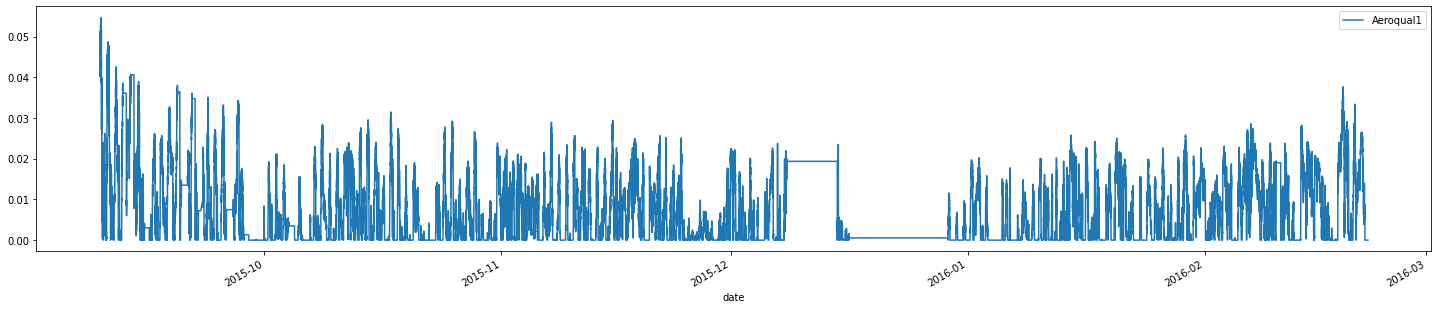

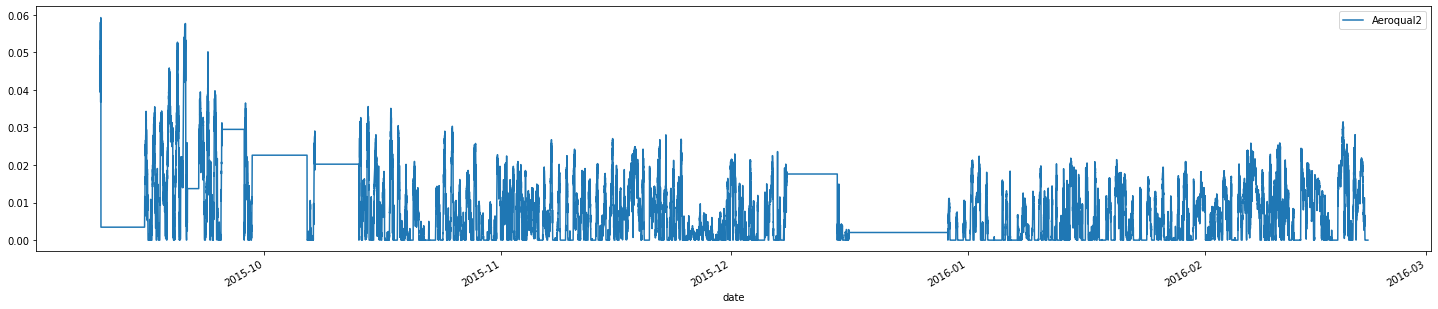

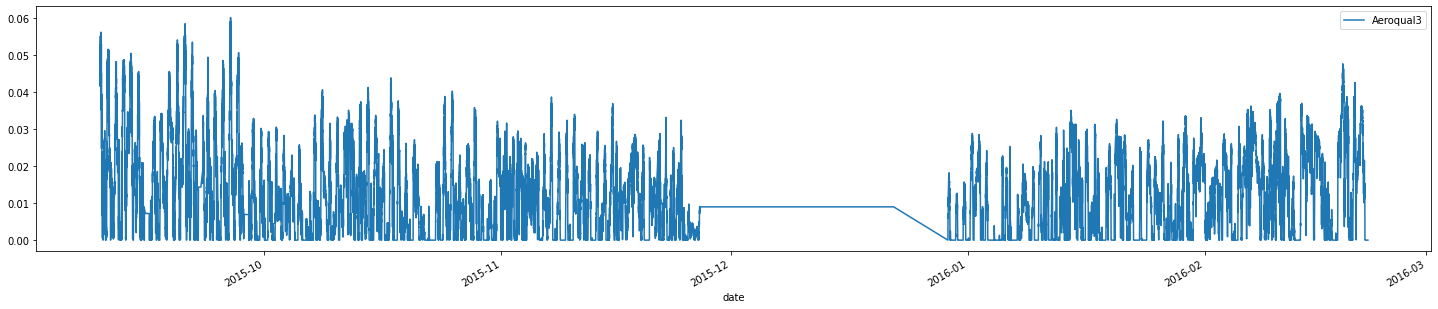

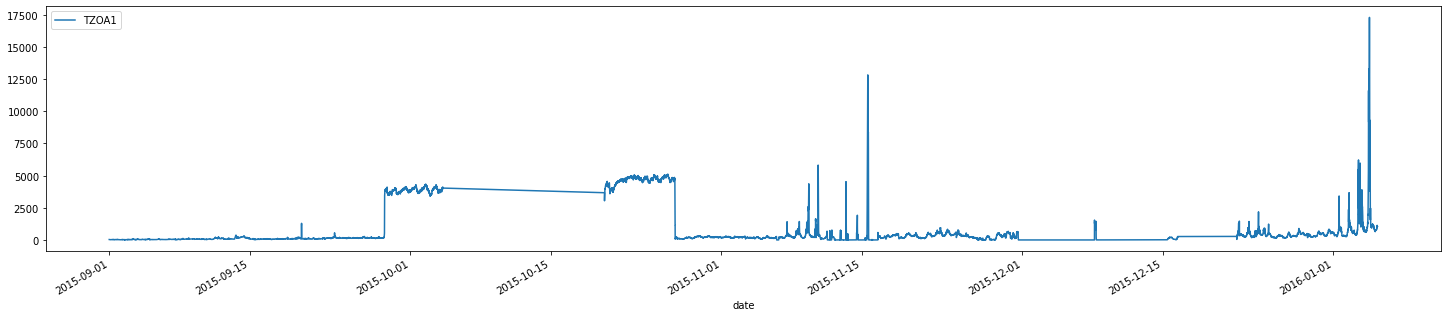

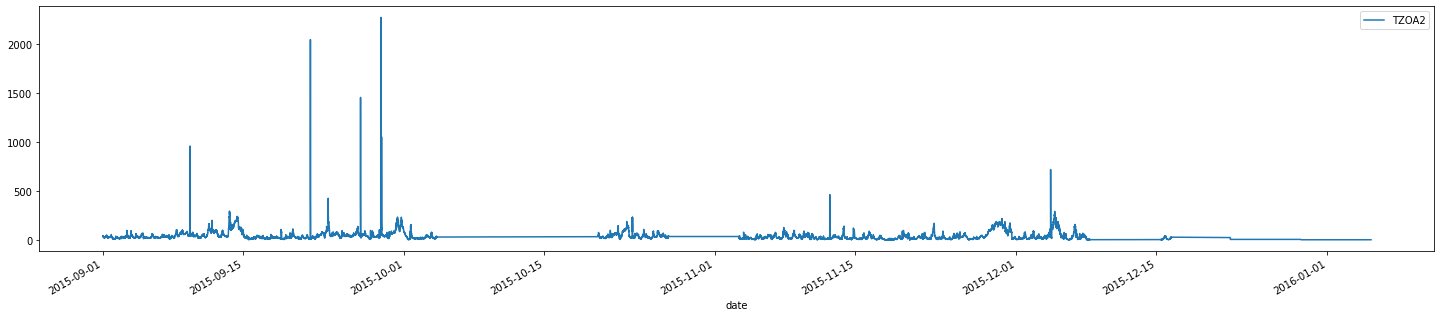

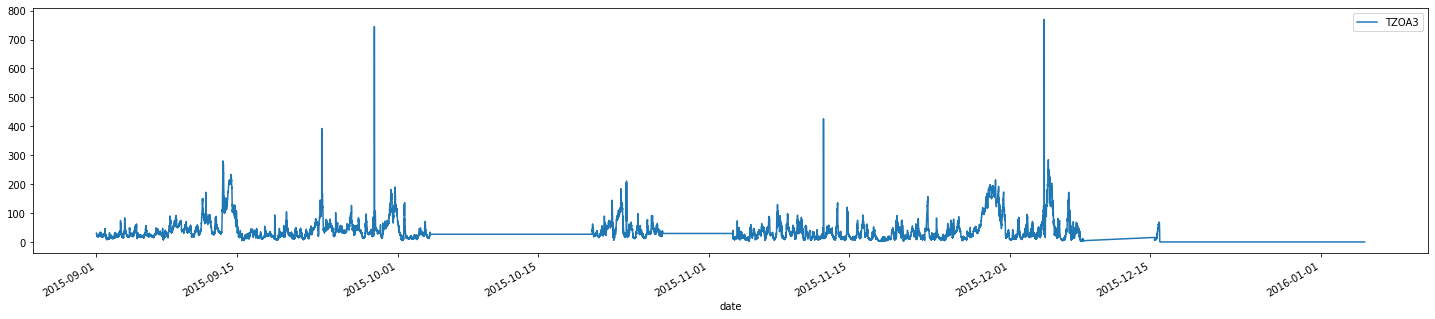

In [15]:
for y in df_list_1:
  for a in y.columns.values:
    if re.findall('date',str(a)):
     pass
    elif re.findall('SoC', str(a)):
      pass
    elif re.findall('TEMP' , str(a)):
      pass
    elif re.findall('RHAMB', str(a)):
      pass
    elif re.findall('WS', str(a)):
      pass
    elif re.findall('WD', str(a)):
      pass
    else:
      df_1=y[a]
      df_2=y['date']
      df_3=pd.concat([df_1,df_2], axis=1)
      df_3.plot(figsize=(25,5), x='date')
      plt.show

# Stationary and Autocorrelation

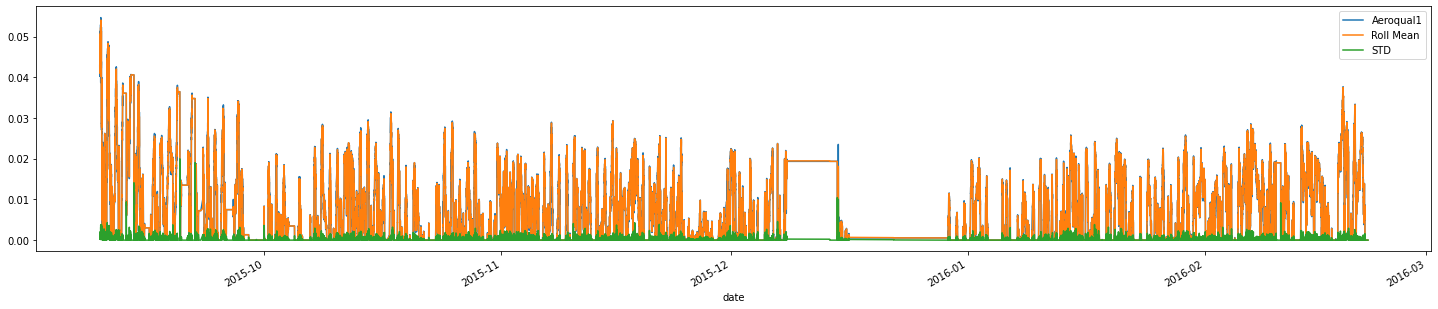

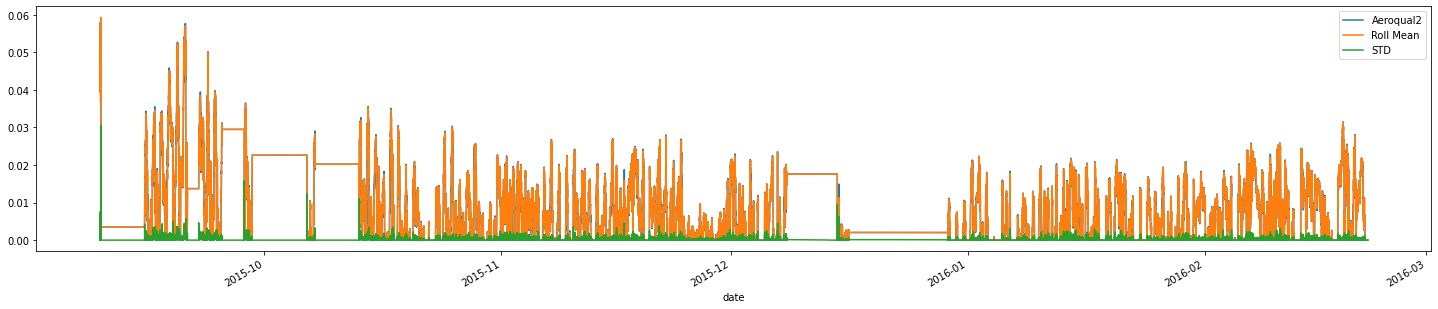

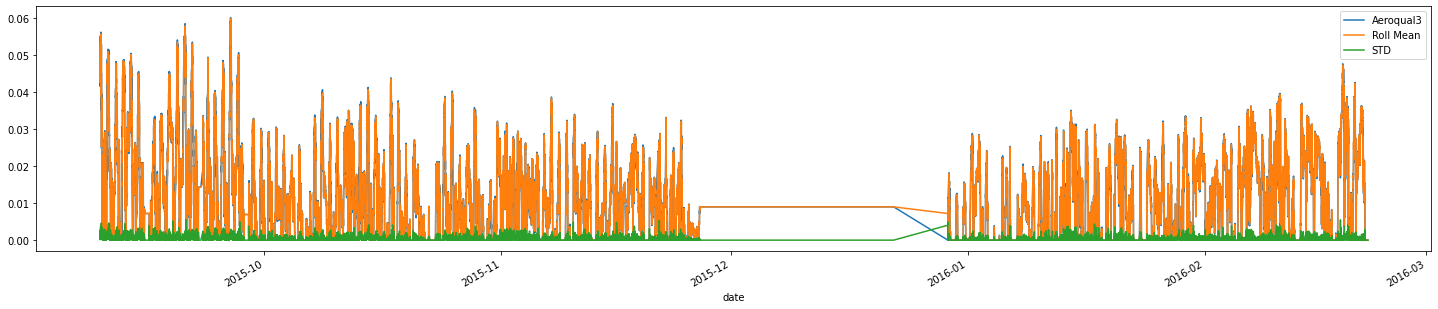

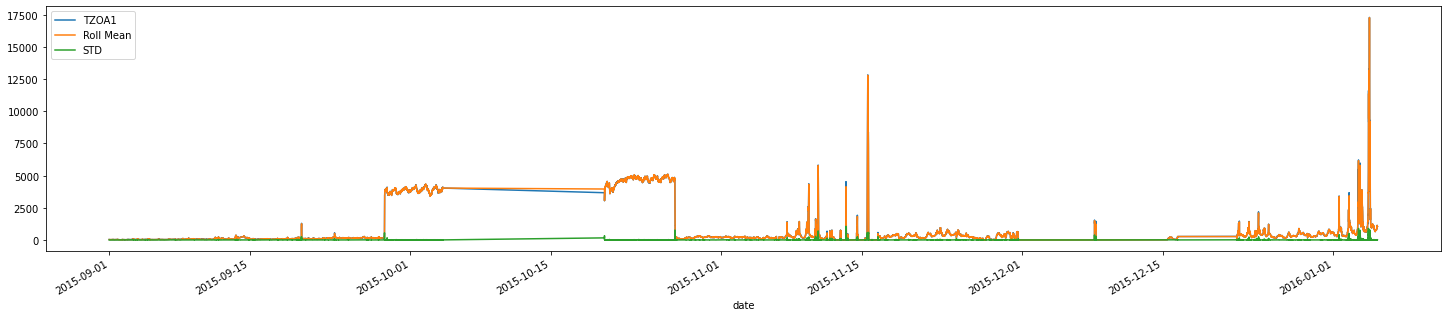

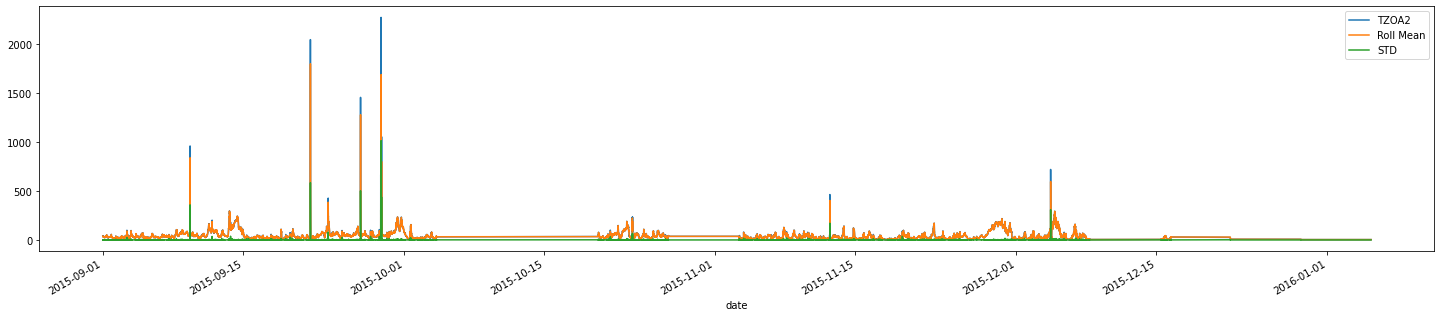

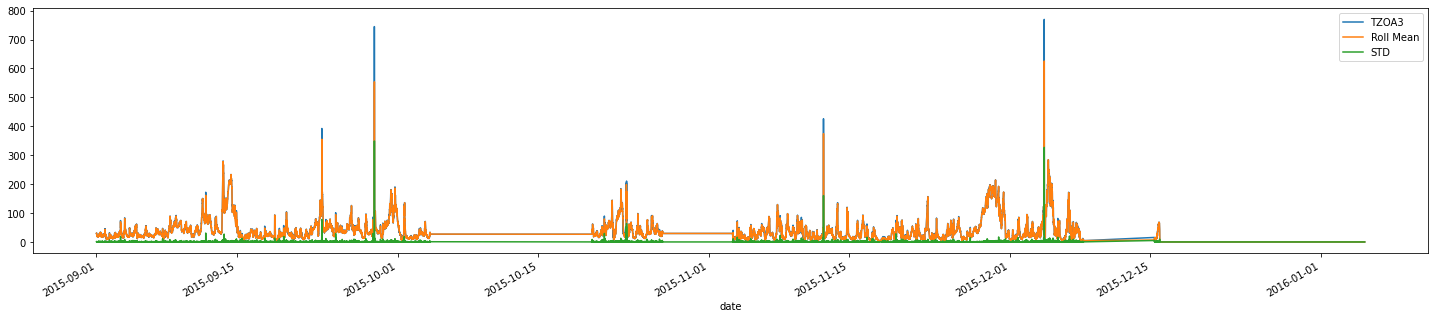

In [16]:
for y in df_list_1:
  for a in y.columns.values:
    if re.findall('date',str(a)):
     pass
    elif re.findall('SoC', str(a)):
      pass
    elif re.findall('TEMP' , str(a)):
      pass
    elif re.findall('RHAMB', str(a)):
      pass
    elif re.findall('WS', str(a)):
      pass
    elif re.findall('WD', str(a)):
      pass
    else:
      df_1=y[a]
      df_2=y['date']
      df_3=pd.concat([df_1,df_2], axis=1)
      df_3['Roll Mean'] = df_3[a].rolling(5).mean()
      df_3['STD'] = df_3[a].rolling(5).std()
      df_3.plot(figsize=(25,5), x='date')
      plt.show()

Aeroqual1


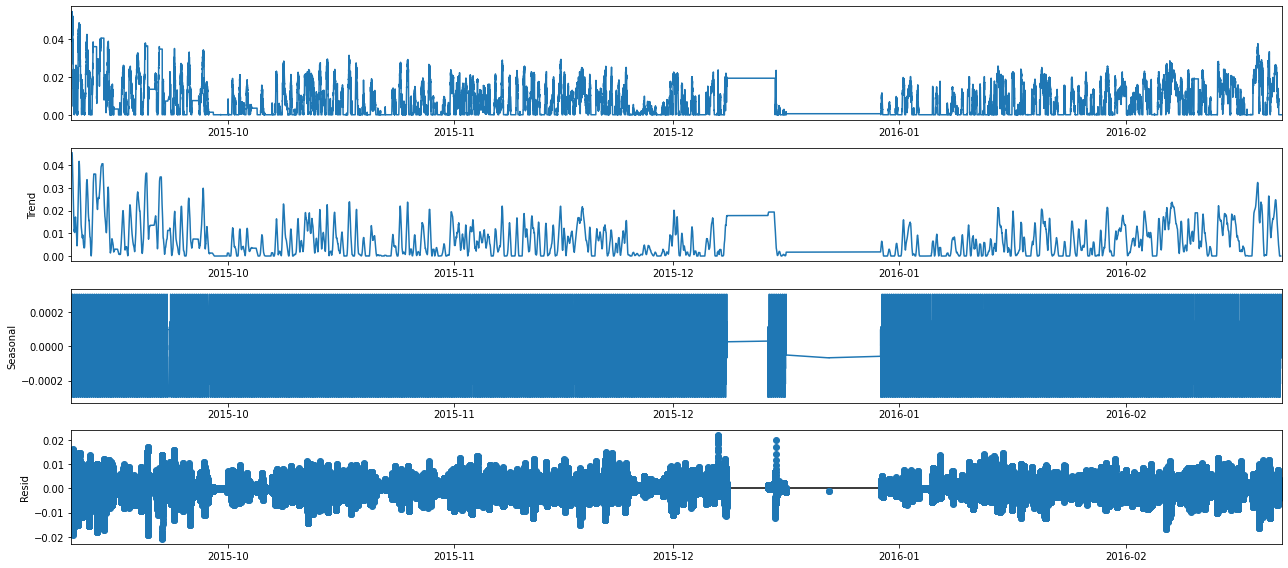

Aeroqual2


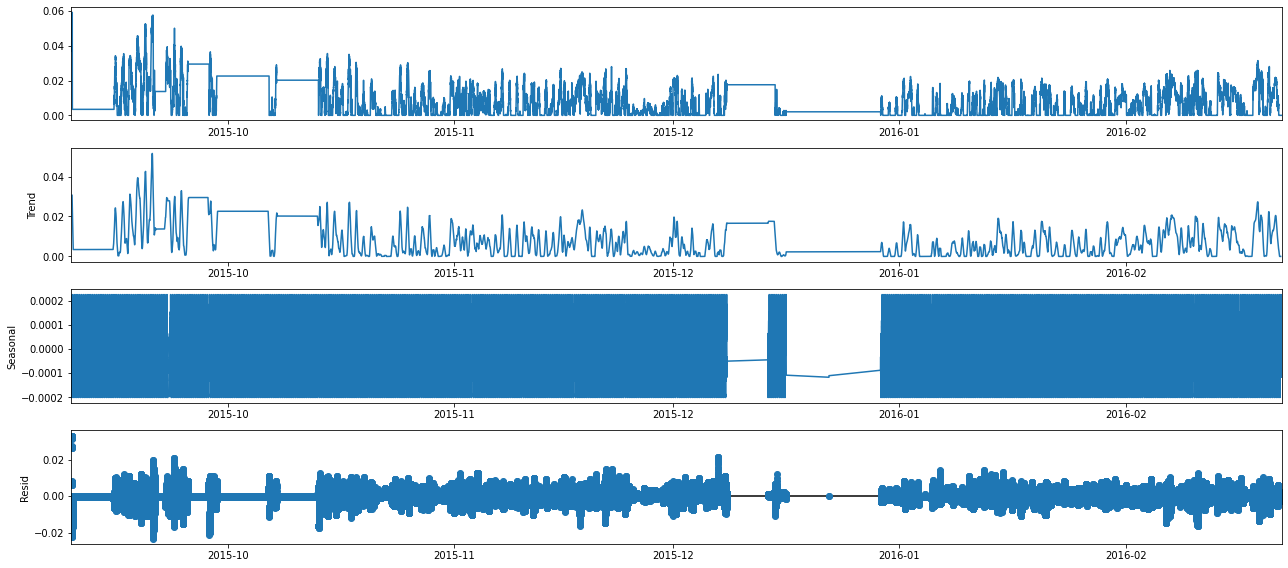

Aeroqual3


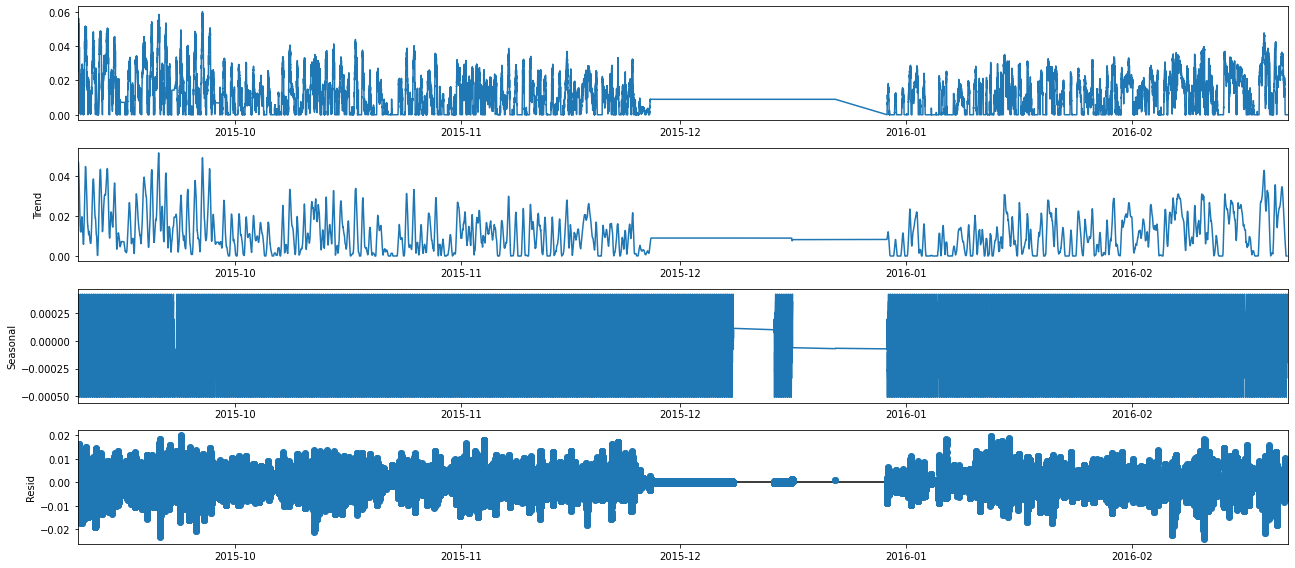

TZOA1


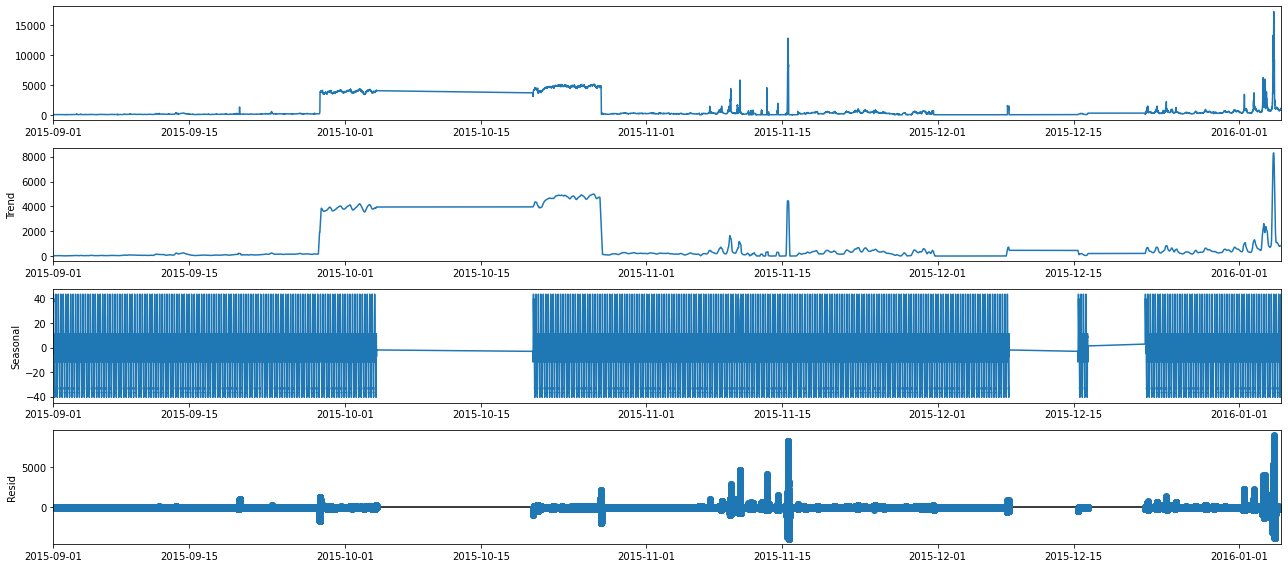

TZOA2


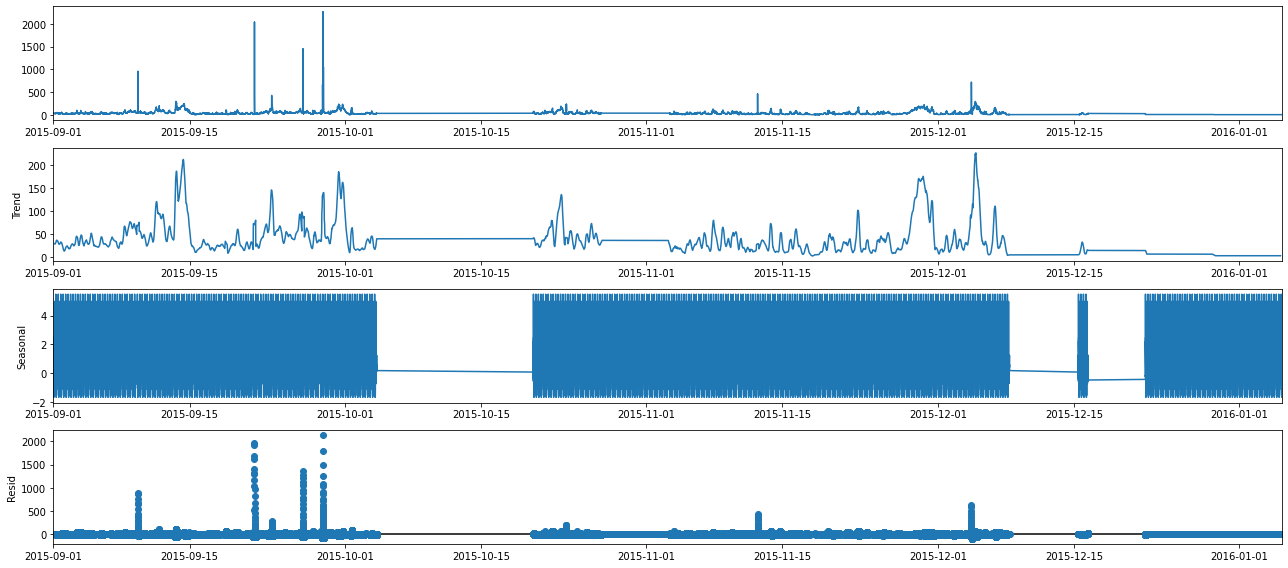

TZOA3


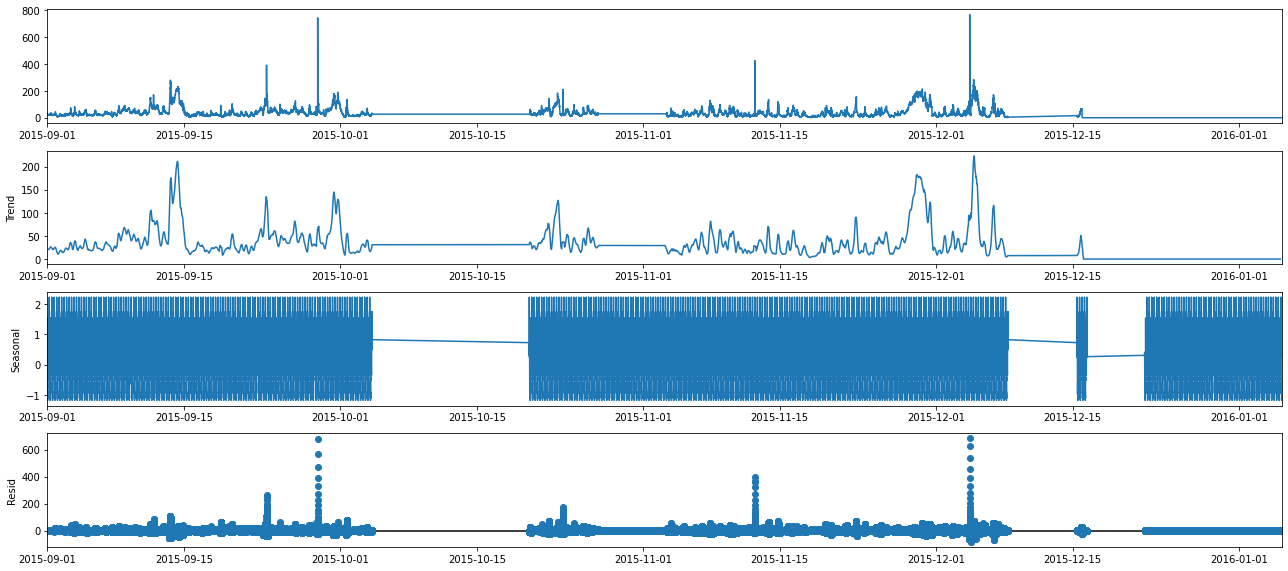

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

for y in df_list_1:
  for a in y.columns.values:
    if re.findall('date',str(a)):
     pass
    elif re.findall('SoC', str(a)):
      pass
    elif re.findall('TEMP' , str(a)):
      pass
    elif re.findall('RHAMB', str(a)):
      pass
    elif re.findall('WS', str(a)):
      pass
    elif re.findall('WD', str(a)):
      pass
    else:
      df_1=y[a]
      df_2=y['date']
      df_3=pd.concat([df_1,df_2], axis=1)
      df_3=df_3.set_index(['date'])
      decomposition = sm.tsa.seasonal_decompose(df_3, model='additive', freq=365)
      print(a)
      fig = decomposition.plot()
      plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test

for y in df_list_1:
  for a in y.columns.values:
    if re.findall('date',str(a)):
     pass
    elif re.findall('SoC', str(a)):
      pass
    elif re.findall('TEMP' , str(a)):
      pass
    elif re.findall('RHAMB', str(a)):
      pass
    elif re.findall('WS', str(a)):
      pass
    elif re.findall('WD', str(a)):
      pass
    else:
      df_1=y[a]
      result = adfuller(df_1)
      # Print p-value
      print(a)
      print(result[1])

Aeroqual1
2.877057768211545e-29
Aeroqual2
6.1766936653645014e-27
Aeroqual3
3.901152943981922e-30
TZOA1
3.4119084393386803e-10
TZOA2
2.7674684931418336e-22
TZOA3
2.776898339227348e-16


## Autocorrelation

Aeroqual1
Aeroqual2
Aeroqual3
TZOA1
TZOA2
TZOA3


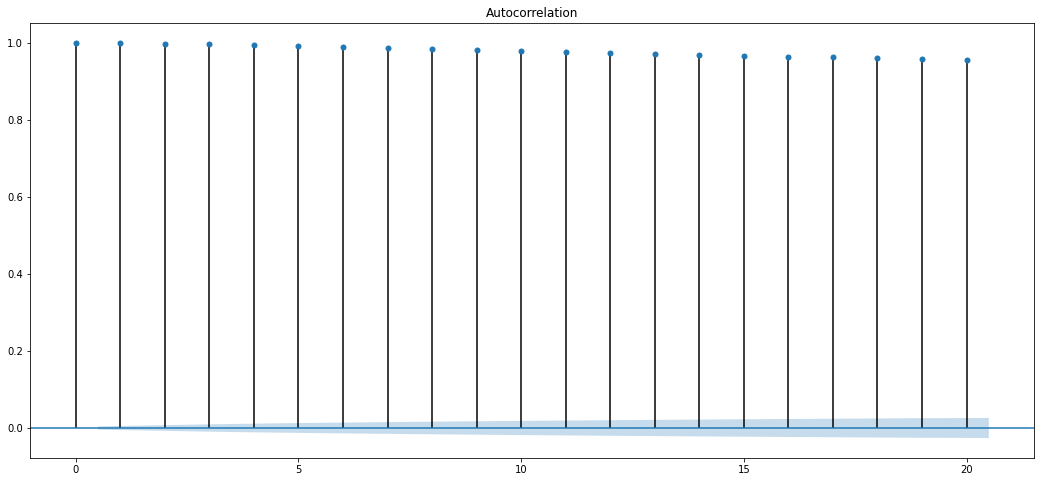

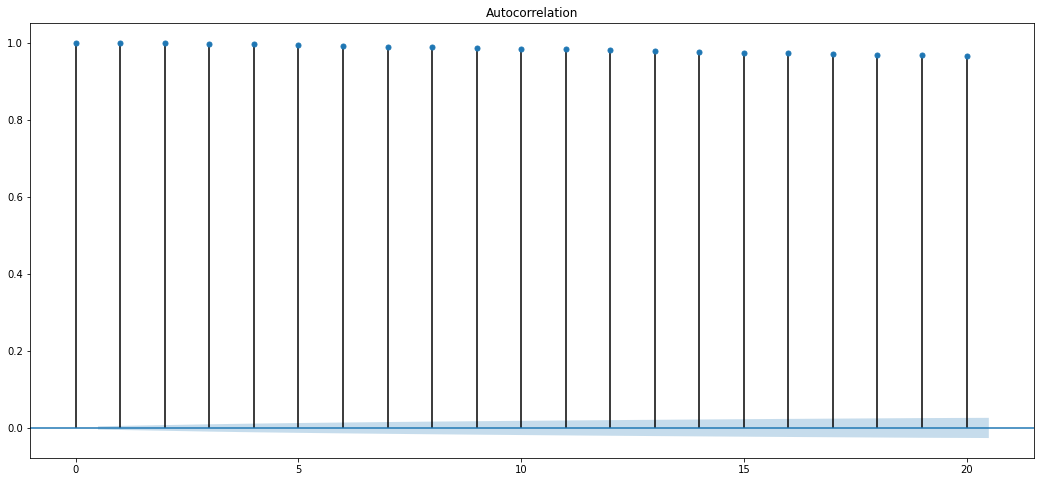

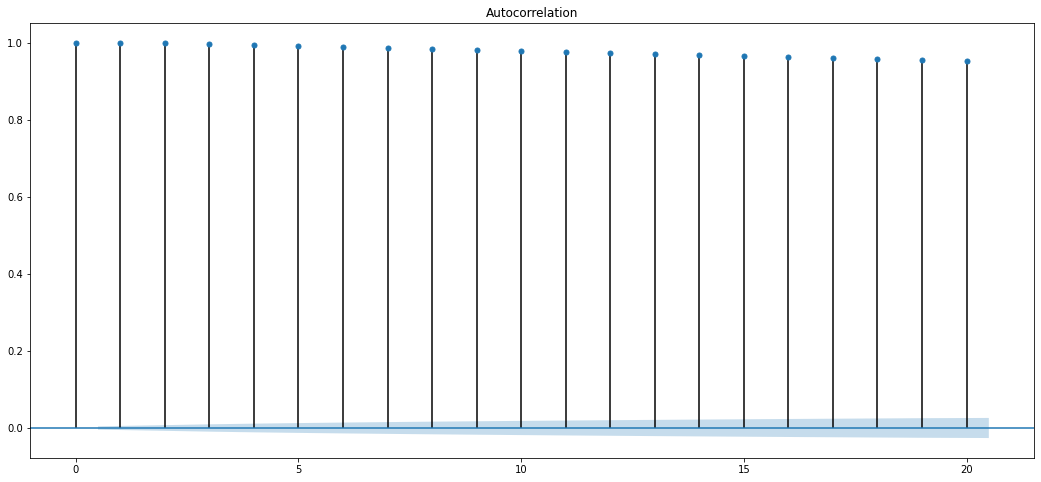

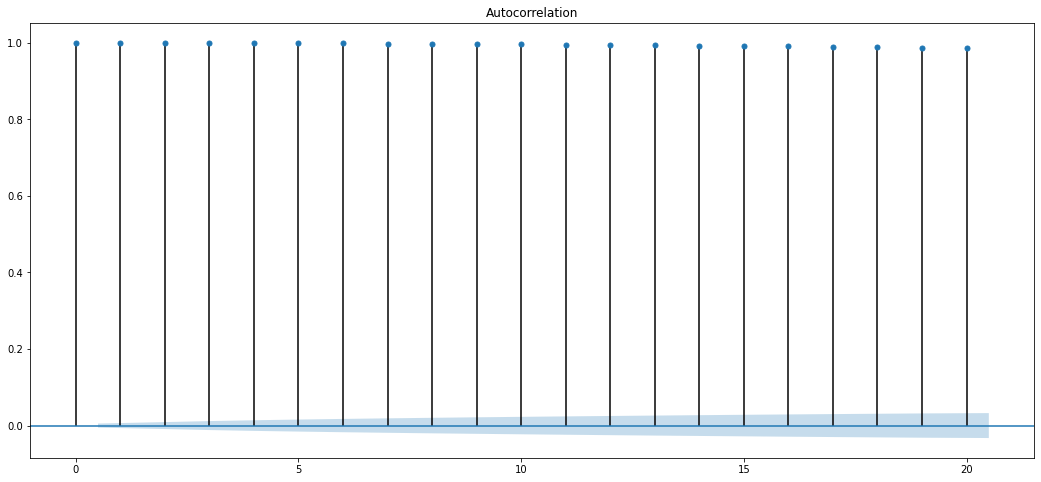

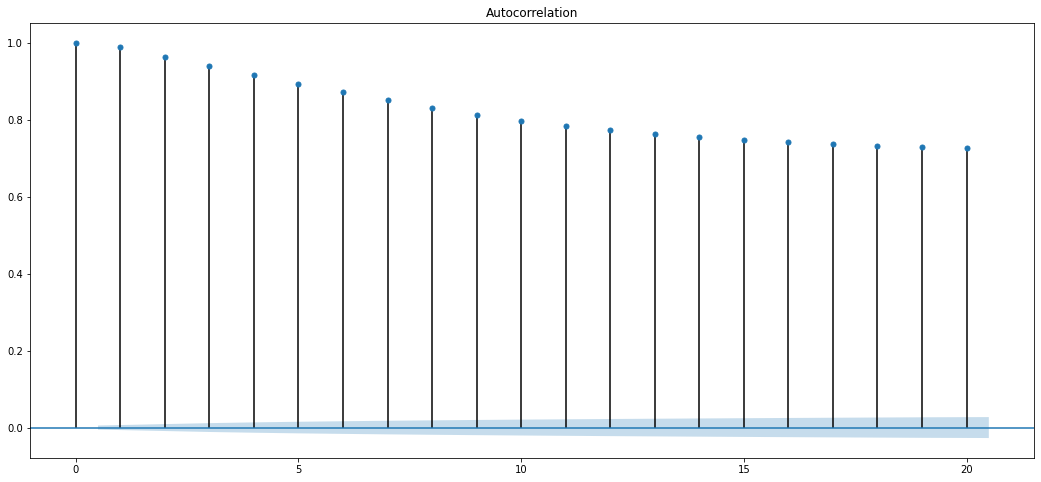

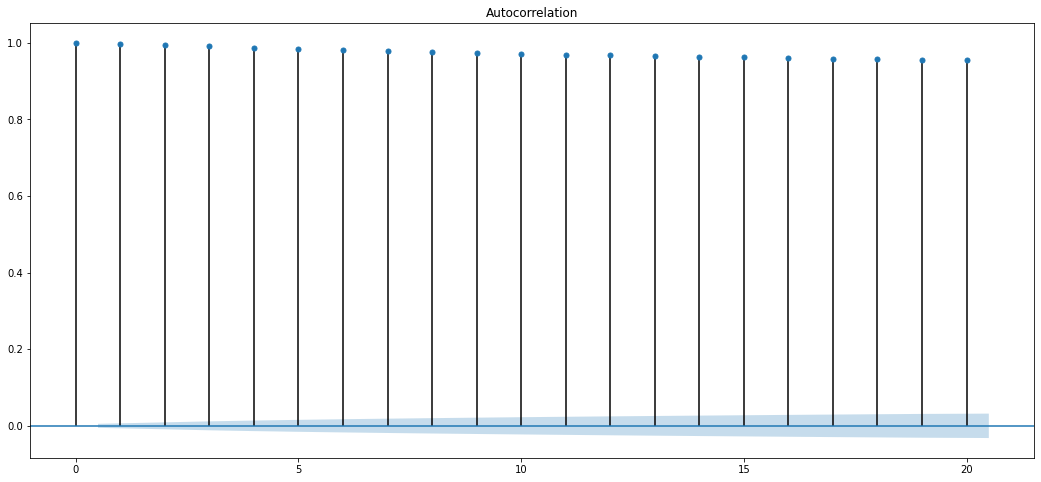

In [ ]:
# Plotting the ACF plot


for y in df_list_1:
  for a in y.columns.values:
    if re.findall('date',str(a)):
     pass
    elif re.findall('SoC', str(a)):
      pass
    elif re.findall('TEMP' , str(a)):
      pass
    elif re.findall('RHAMB', str(a)):
      pass
    elif re.findall('WS', str(a)):
      pass
    elif re.findall('WD', str(a)):
      pass
    else:
      df_1=y[a]
      print(a)
      plot_acf(df_1.dropna(), lags=20, alpha=0.05)

## Correlation

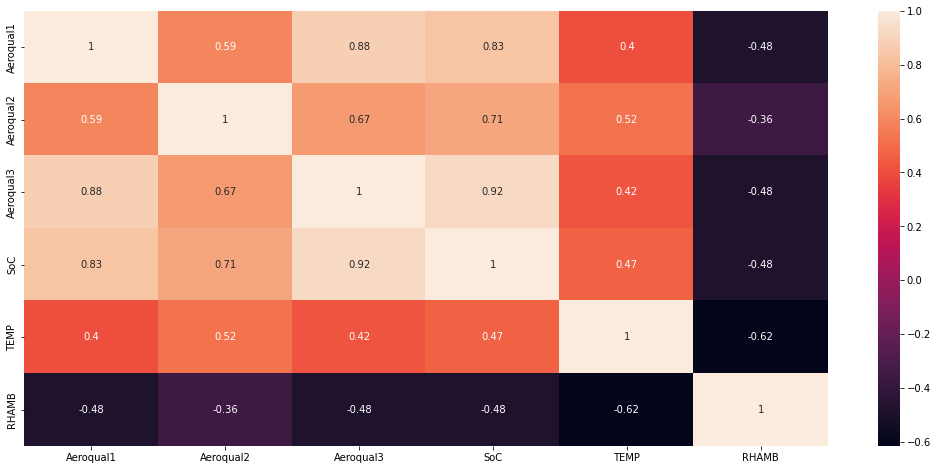

In [ ]:
corr = df_list_1[0].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

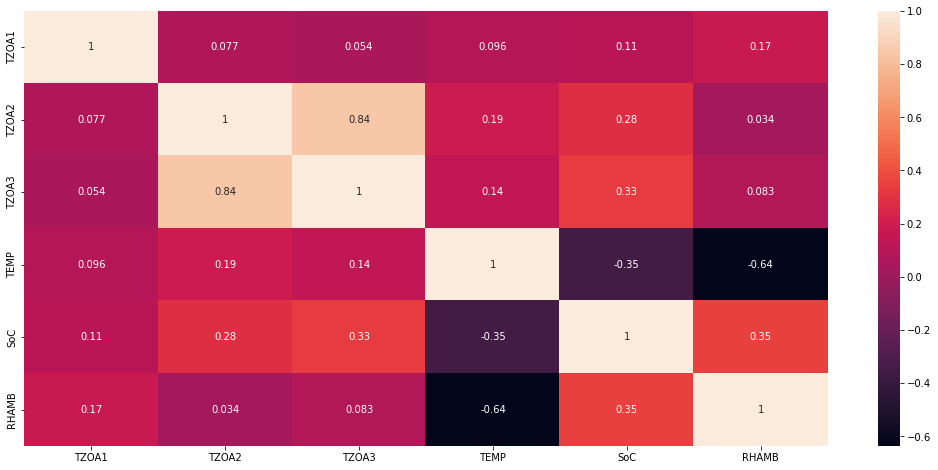

In [ ]:
corr = df_list_1[1].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

# Pre-Processing and Dimensionality Reduction (PCA)

#### Performing dimensionality reduction on Aeroqual sensor  Data 

In [18]:
df_list_1[0]

,Aeroqual1,Aeroqual2,Aeroqual3,SoC,TEMP,RHAMB,date
715,4.289648e-02,4.100000e-02,4.647603e-02,0.052370,85.840449,7.410946,2015-09-09 11:37:00
716,4.259475e-02,4.317285e-02,4.640029e-02,0.052470,85.754461,7.393294,2015-09-09 11:38:00
717,4.345474e-02,4.702966e-02,4.665481e-02,0.052714,85.745796,7.378451,2015-09-09 11:39:00
718,4.370060e-02,4.892946e-02,4.480049e-02,0.052282,85.802151,7.397790,2015-09-09 11:40:00
719,4.167989e-02,4.894883e-02,4.324120e-02,0.050964,85.881361,7.461783,2015-09-09 11:41:00
...,...,...,...,...,...,...,...
212042,1.797663e-46,1.547589e-46,3.626239e-46,0.001793,35.781237,51.423333,2016-02-22 08:45:00
212043,1.511648e-46,1.301362e-46,3.049291e-46,0.001826,35.943325,51.212786,2016-02-22 08:46:00
212044,1.271139e-46,1.094310e-46,2.564138e-46,0.001853,36.127357,51.035738,2016-02-22 08:47:00
212045,1.068897e-46,9.202017e-47,2.156175e-46,0.001877,36.298018,50.886858,2016-02-22 08:48:00


In [19]:
x=df_list_1[0].drop(columns=['SoC', 'TEMP', 'RHAMB', 'date'])

In [20]:
# Making the pipeline 
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

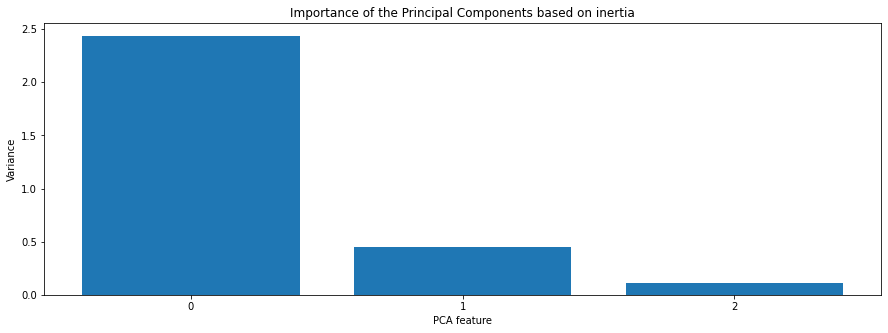

In [21]:
features = range(pca.n_components_)
plt.figure(figsize=(15, 5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [22]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [23]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

KeyboardInterrupt: ignored

In [ ]:
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

1.2606704286218651e-19


# Modeling 

### In this step, I will perform the following learning algorithms to detect anomalies.

#### Benchmark model: Interquartile Range (IQR)
#### K-Means clustering
#### Isolation Forest

### Interquartile Range :-

In [24]:
# Calculate IQR for the 1st principal component (pc1)
df_list_1[0]=pd.concat([df_list_1[0], principalDf], axis=1)
q1_pc1, q3_pc1 = df_list_1[0]['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1

# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

# Filter out the outliers from the pc1
df_list_1[0]['anomaly_pc1'] = ((df_list_1[0]['pc1']>upper_pc1) | (df_list_1[0]['pc1']<lower_pc1)).astype('int')


# Calculate IQR for the 2nd principal component (pc2)
q1_pc2, q3_pc2 = df_list_1[0]['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2

# Calculate upper and lower bounds for outlier for pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

# Filter out the outliers from the pc2
df_list_1[0]['anomaly_pc2'] = ((df_list_1[0]['pc2']>upper_pc2) | (df_list_1[0]['pc2']<lower_pc2)).astype('int')

In [28]:
df_list_1

[           Aeroqual1     Aeroqual2     Aeroqual3       SoC       TEMP  \
 0                NaN           NaN           NaN       NaN        NaN   
 1                NaN           NaN           NaN       NaN        NaN   
 2                NaN           NaN           NaN       NaN        NaN   
 3                NaN           NaN           NaN       NaN        NaN   
 4                NaN           NaN           NaN       NaN        NaN   
 ...              ...           ...           ...       ...        ...   
 212042  1.797663e-46  1.547589e-46  3.626239e-46  0.001793  35.781237   
 212043  1.511648e-46  1.301362e-46  3.049291e-46  0.001826  35.943325   
 212044  1.271139e-46  1.094310e-46  2.564138e-46  0.001853  36.127357   
 212045  1.068897e-46  9.202017e-47  2.156175e-46  0.001877  36.298018   
 212046  8.988313e-47  7.737943e-47  1.813120e-46  0.001896  36.457437   
 
             RHAMB                date       pc1       pc2  anomaly_pc1  \
 0             NaN                 

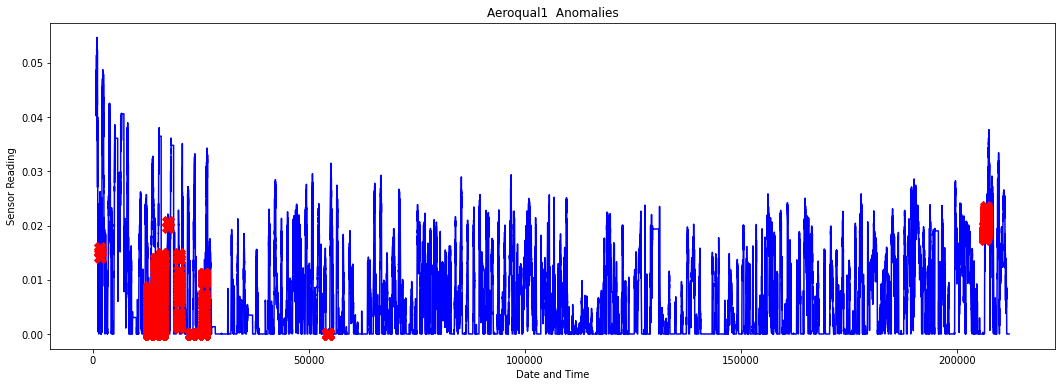

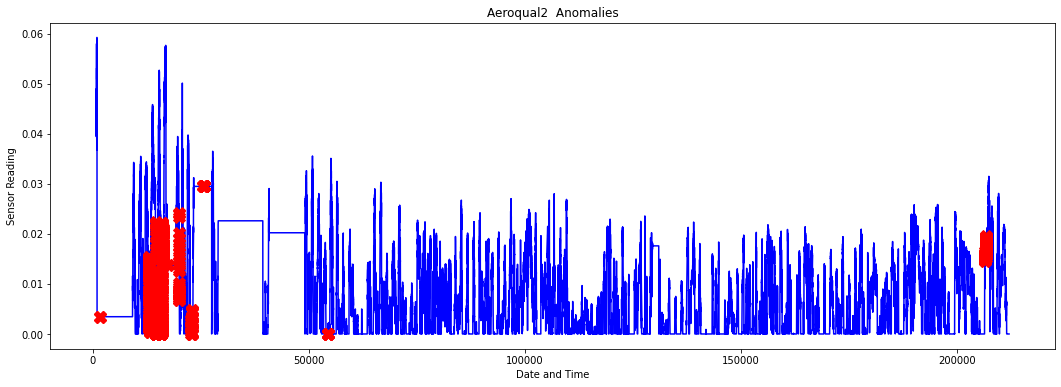

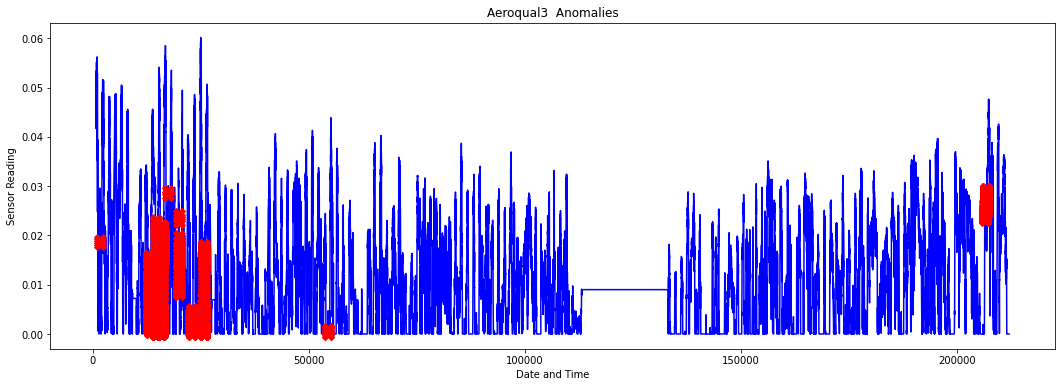

In [25]:
# Let's plot the outliers from pc1 on top of the Aeroqual 1 and see where they occured in the time series

for a in df_list_1[0].columns.values:
  if re.findall('date',str(a)):
    pass
  elif re.findall('SoC', str(a)):
    pass
  elif re.findall('TEMP' , str(a)):
    pass
  elif re.findall('RHAMB', str(a)):
    pass
  elif re.findall('WS', str(a)):
    pass
  elif re.findall('WD', str(a)):
    pass
  elif re.findall('pc1', str(a)):
    pass
  elif re.findall('pc2', str(a)):
    pass
  elif re.findall('anomaly_pc1', str(a)):
    pass
  elif re.findall('anomaly_pc2', str(a)):
    pass
  else:
    b = df_list_1[0][df_list_1[0]['anomaly_pc1'] == 1] #anomaly
    plt.figure(figsize=(18,6))
    plt.plot(df_list_1[0][a], color='blue', label='Normal')
    plt.plot(b[a], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    plt.xlabel('Date and Time')
    plt.ylabel('Sensor Reading')
    plt.title(str(a)+ '  Anomalies')
    plt.show()

### K-Means clustering

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)
# Assume that 1% of the entire data set are anomalies 
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 1% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 1% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df_list_1[0]['anomaly1_Kmeans'] = (distance >= threshold).astype(int)

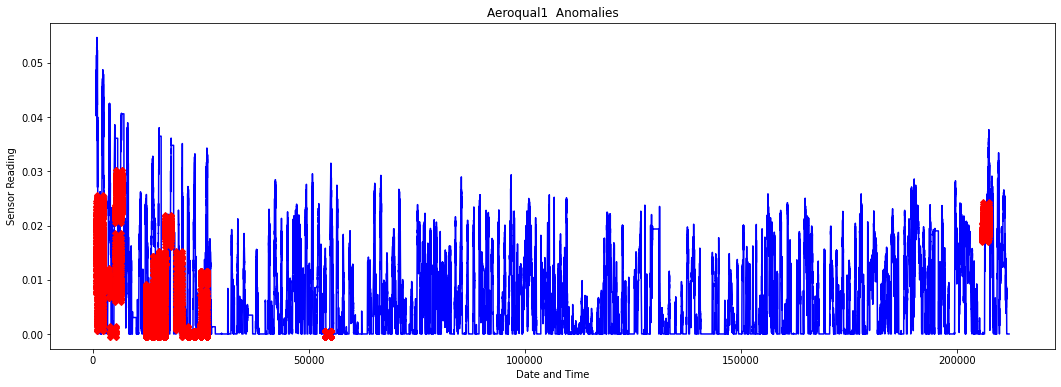

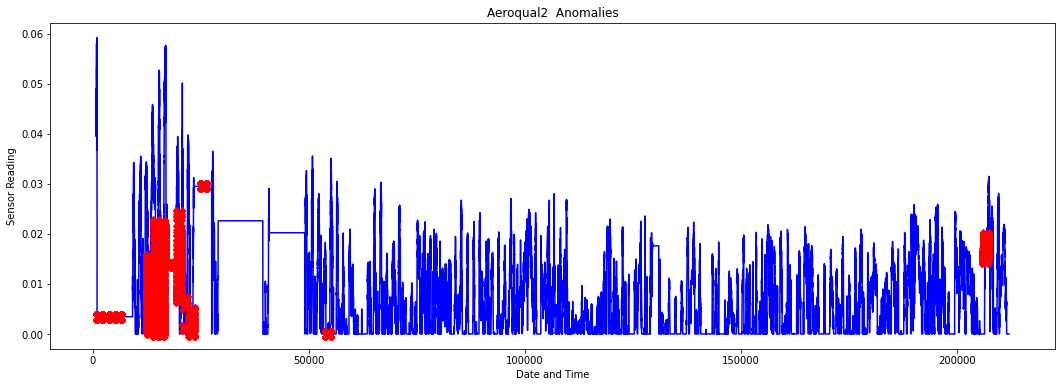

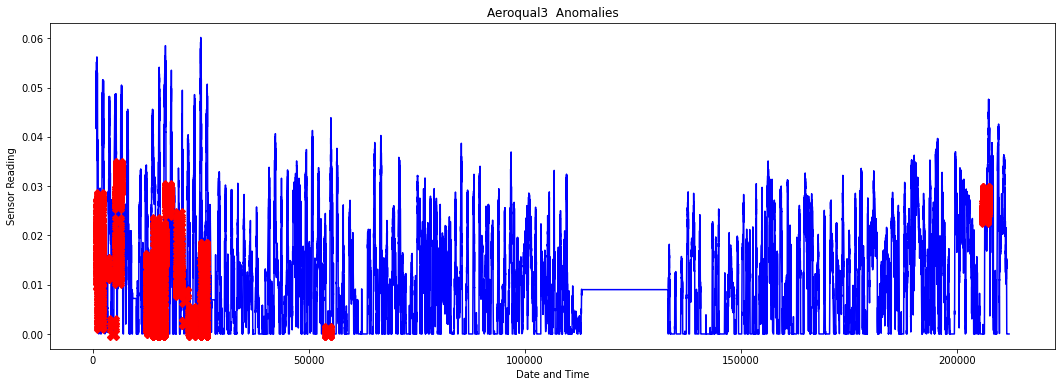

In [ ]:
# Let's plot the outliers from pc1 on top of the Aeroqual 1 and see where they occured in the time series

for a in df_list_1[0].columns.values:
  if re.findall('date',str(a)):
    pass
  elif re.findall('SoC', str(a)):
    pass
  elif re.findall('TEMP' , str(a)):
    pass
  elif re.findall('RHAMB', str(a)):
    pass
  elif re.findall('WS', str(a)):
    pass
  elif re.findall('WD', str(a)):
    pass
  elif re.findall('pc1', str(a)):
    pass
  elif re.findall('pc2', str(a)):
    pass
  elif re.findall('anomaly_pc1', str(a)):
    pass
  elif re.findall('anomaly_pc2', str(a)):
    pass
  elif re.findall('anomaly1_Kmeans', str(a)):
    pass
  else:
    b = df_list_1[0][df_list_1[0]['anomaly1_Kmeans'] == 1] #anomaly
    plt.figure(figsize=(18,6))
    plt.plot(df_list_1[0][a], color='blue', label='Normal')
    plt.plot(b[a], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    plt.xlabel('Date and Time')
    plt.ylabel('Sensor Reading')
    plt.title(str(a)+ '  Anomalies')
    plt.show()

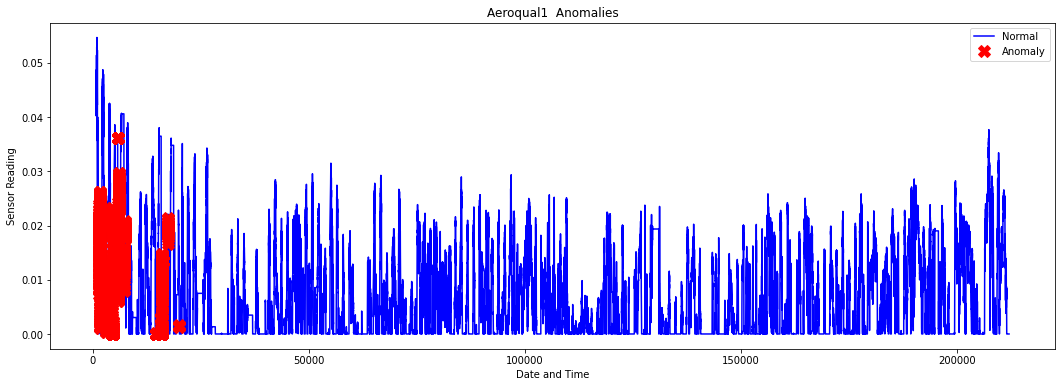

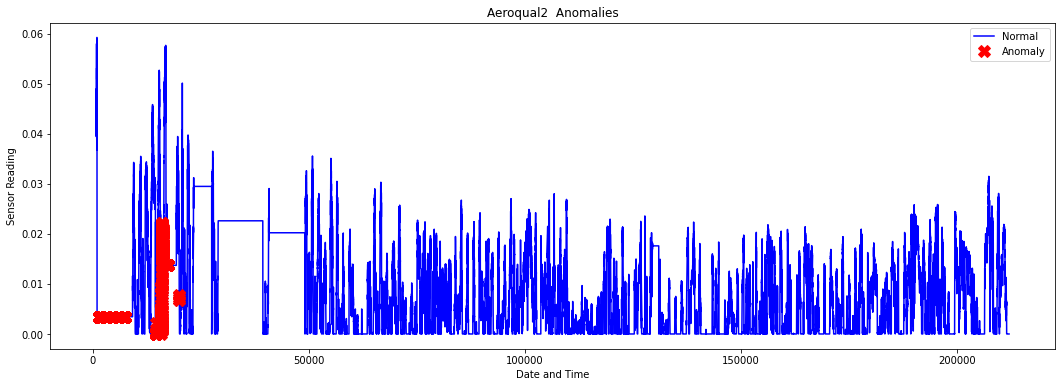

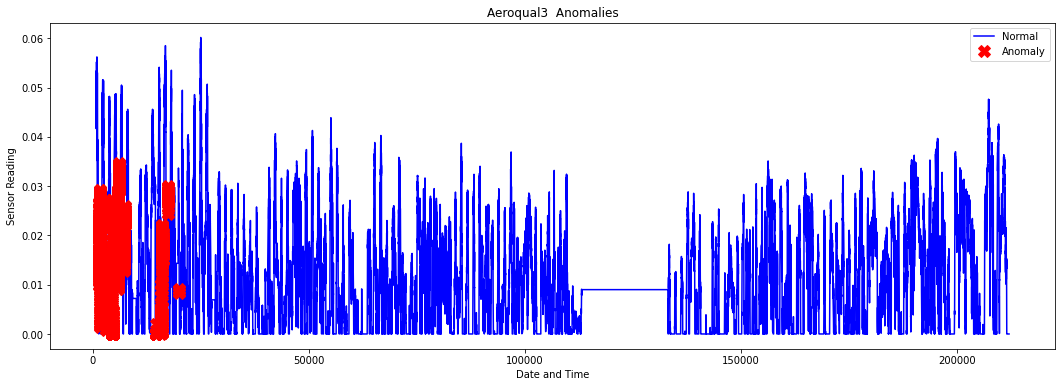

In [ ]:
# Import IsolationForest

# Assume that 1% of the entire data set are anomalies
 
outliers_fraction = 0.01
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
df_list_1[0]['anomaly2_isolation_forest'] = pd.Series(model.predict(principalDf.values))
# visualization
# df_list_1[0]['anomaly2_isolation_forest'] = pd.Series(principalDf['anomaly2_isolation_forest'].values, index=df_list_1[0].index)

for a in df_list_1[0].columns.values:
  if re.findall('date',str(a)):
    pass
  elif re.findall('SoC', str(a)):
    pass
  elif re.findall('TEMP' , str(a)):
    pass
  elif re.findall('RHAMB', str(a)):
    pass
  elif re.findall('WS', str(a)):
    pass
  elif re.findall('WD', str(a)):
    pass
  elif re.findall('pc1', str(a)):
    pass
  elif re.findall('pc2', str(a)):
    pass
  elif re.findall('anomaly_pc1', str(a)):
    pass
  elif re.findall('anomaly_pc2', str(a)):
    pass
  elif re.findall('anomaly1_Kmeans', str(a)):
    pass
  elif re.findall('anomaly2_isolation_forest', str(a)):
    pass
  else:
    b =df_list_1[0].loc[df_list_1[0]['anomaly2_isolation_forest'] == -1] #anomaly
    plt.figure(figsize=(18,6))
    plt.plot(df_list_1[0][a], color='blue', label='Normal')
    plt.plot(b[a], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    plt.xlabel('Date and Time')
    plt.ylabel('Sensor Reading')
    plt.title(str(a)+ '  Anomalies')
    plt.legend(loc='best')
    plt.show();

In [ ]:
df_list_1[0]=df_list_1[0].set_index('date')
df_list_1[0]

,Aeroqual1,Aeroqual2,Aeroqual3,SoC,TEMP,RHAMB
date,,,,,,
2015-09-09 11:37:00,4.289648e-02,4.100000e-02,4.647603e-02,0.052370,85.840449,7.410946
2015-09-09 11:38:00,4.259475e-02,4.317285e-02,4.640029e-02,0.052470,85.754461,7.393294
2015-09-09 11:39:00,4.345474e-02,4.702966e-02,4.665481e-02,0.052714,85.745796,7.378451
2015-09-09 11:40:00,4.370060e-02,4.892946e-02,4.480049e-02,0.052282,85.802151,7.397790
2015-09-09 11:41:00,4.167989e-02,4.894883e-02,4.324120e-02,0.050964,85.881361,7.461783
...,...,...,...,...,...,...
2016-02-22 08:45:00,1.797663e-46,1.547589e-46,3.626239e-46,0.001793,35.781237,51.423333
2016-02-22 08:46:00,1.511648e-46,1.301362e-46,3.049291e-46,0.001826,35.943325,51.212786
2016-02-22 08:47:00,1.271139e-46,1.094310e-46,2.564138e-46,0.001853,36.127357,51.035738


In [ ]:
df_list_1[2]=df_list_1[2].set_index('date')

In [ ]:
df_combine=df_list_1[0].merge(df_list_1[2], how='inner', on='date')

In [ ]:
df_combine

,Aeroqual1,Aeroqual2,Aeroqual3,SoC,TEMP,RHAMB,WS,WD
date,,,,,,,,
2015-09-09 11:37:00,4.289648e-02,4.100000e-02,4.647603e-02,0.052370,85.840449,7.410946,4.151483,83.462930
2015-09-09 11:38:00,4.259475e-02,4.317285e-02,4.640029e-02,0.052470,85.754461,7.393294,4.175112,78.584348
2015-09-09 11:39:00,4.345474e-02,4.702966e-02,4.665481e-02,0.052714,85.745796,7.378451,3.844954,72.700006
2015-09-09 11:40:00,4.370060e-02,4.892946e-02,4.480049e-02,0.052282,85.802151,7.397790,3.535505,63.933397
2015-09-09 11:41:00,4.167989e-02,4.894883e-02,4.324120e-02,0.050964,85.881361,7.461783,3.720780,61.127860
...,...,...,...,...,...,...,...,...
2016-02-22 08:45:00,1.797663e-46,1.547589e-46,3.626239e-46,0.001793,35.781237,51.423333,0.811435,167.758648
2016-02-22 08:46:00,1.511648e-46,1.301362e-46,3.049291e-46,0.001826,35.943325,51.212786,0.777795,154.575540
2016-02-22 08:47:00,1.271139e-46,1.094310e-46,2.564138e-46,0.001853,36.127357,51.035738,0.749507,141.914786


In [ ]:
outliers_fraction = 0.01
model =  IsolationForest(contamination=outliers_fraction)
model.fit(df_combine.values) 
df_combine['anomaly2_isolation_forest'] = (model.predict(df_combine.values))

In [ ]:
df_combine

,Aeroqual1,Aeroqual2,Aeroqual3,SoC,TEMP,RHAMB,WS,WD,anomaly2_isolation_forest
date,,,,,,,,,
2015-09-09 11:37:00,4.289648e-02,4.100000e-02,4.647603e-02,0.052370,85.840449,7.410946,4.151483,83.462930,-1
2015-09-09 11:38:00,4.259475e-02,4.317285e-02,4.640029e-02,0.052470,85.754461,7.393294,4.175112,78.584348,-1
2015-09-09 11:39:00,4.345474e-02,4.702966e-02,4.665481e-02,0.052714,85.745796,7.378451,3.844954,72.700006,-1
2015-09-09 11:40:00,4.370060e-02,4.892946e-02,4.480049e-02,0.052282,85.802151,7.397790,3.535505,63.933397,-1
2015-09-09 11:41:00,4.167989e-02,4.894883e-02,4.324120e-02,0.050964,85.881361,7.461783,3.720780,61.127860,-1
...,...,...,...,...,...,...,...,...,...
2016-02-22 08:45:00,1.797663e-46,1.547589e-46,3.626239e-46,0.001793,35.781237,51.423333,0.811435,167.758648,1
2016-02-22 08:46:00,1.511648e-46,1.301362e-46,3.049291e-46,0.001826,35.943325,51.212786,0.777795,154.575540,1
2016-02-22 08:47:00,1.271139e-46,1.094310e-46,2.564138e-46,0.001853,36.127357,51.035738,0.749507,141.914786,1


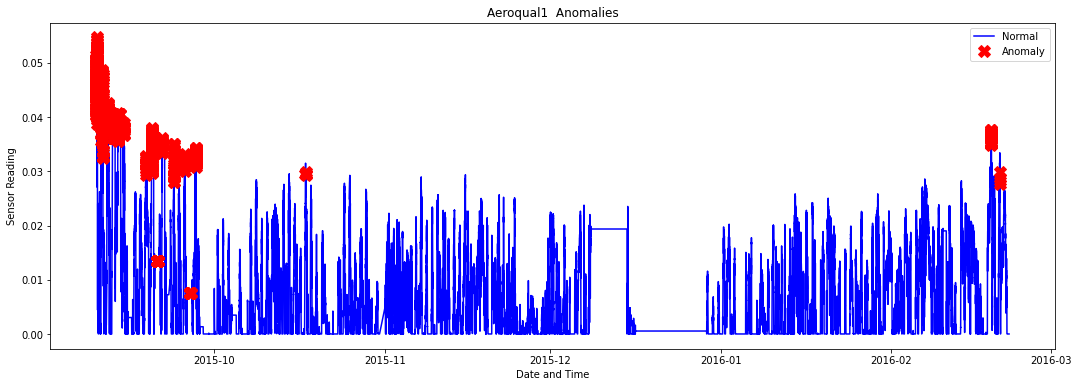

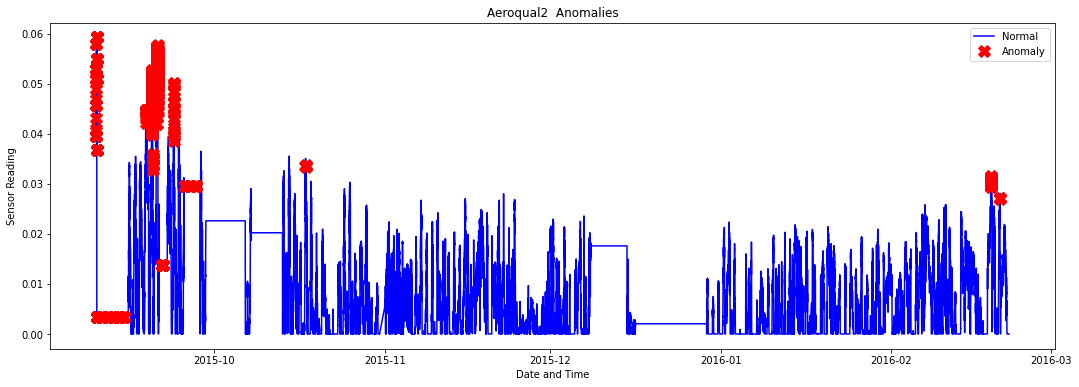

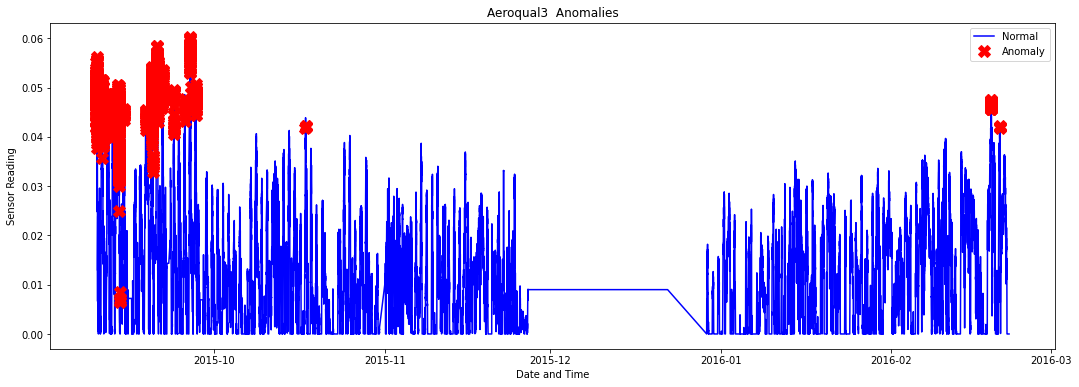

In [ ]:
for a in df_list_1[0].columns.values:
  if re.findall('date',str(a)):
    pass
  elif re.findall('SoC', str(a)):
    pass
  elif re.findall('TEMP' , str(a)):
    pass
  elif re.findall('RHAMB', str(a)):
    pass
  elif re.findall('WS', str(a)):
    pass
  elif re.findall('WD', str(a)):
    pass
  else:
    b =df_combine.loc[df_combine['anomaly2_isolation_forest'] == -1] #anomaly
    plt.figure(figsize=(18,6))
    plt.plot(df_combine[a], color='blue', label='Normal')
    plt.plot(b[a], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    plt.xlabel('Date and Time')
    plt.ylabel('Sensor Reading')
    plt.title(str(a)+ '  Anomalies')
    plt.legend(loc='best')
    plt.show();

## Using an Auto Encoder to check the outlier 

In [30]:
! pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=3884ba6ed485aef3b666e14c0f63e233602a493704d449acf35cfa271b313a92
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


In [37]:
# df_list_1[0]=df_list_1[0].set_index('date')
df_list_1[0]=df_list_1[0].dropna()

In [49]:
X_train=df_list_1[0][:210117]
X_test=df_list_1[0][210117:]

In [47]:
from pyod.models.auto_encoder import AutoEncoder
atcdr = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr.fit(X_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 2)                 22        
                                                                 
 dropout_10 (Dropout)        (None, 2)                 0         
                                                                 
 dense_13 (Dense)            (None, 2)                

AutoEncoder(batch_size=32, contamination=0.05, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 2], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fae35709a60>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [50]:
# Training data
X_train=df_list_1[0]
y_train_scores = atcdr.decision_function(X_train)
y_train_pred = atcdr.predict(X_train)

# Test data
y_test_scores = atcdr.decision_function(X_test)
y_test_pred = atcdr.predict(X_test) # outlier labels (0 or 1)

16/16 [==============================] - 0s 2ms/step


In [51]:
# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))

The threshold for the defined contamination rate: 5.075102785909165
The training data: {0: 200111, 1: 10506}
The training data: {0: 500}


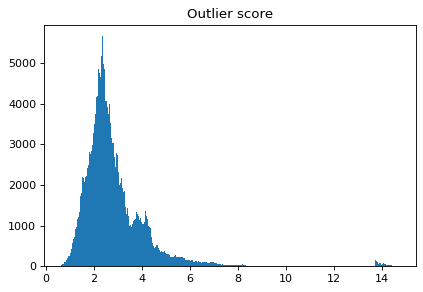

In [52]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()